<a href="https://colab.research.google.com/github/dinaOuahbi/Some_Data_Analysis/blob/main/StatisticFormula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 

%matplotlib inline

In [46]:
df = sns.load_dataset('tips')

In [47]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
#total bill mean
print(
    np.mean(df['total_bill']),
    np.median(df['total_bill']),
    statistics.median(df['total_bill']),
)

19.785942622950824 17.795 17.795


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


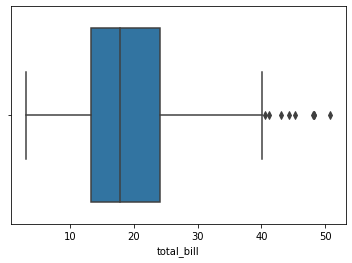

In [49]:
sns.boxplot(df['total_bill'])

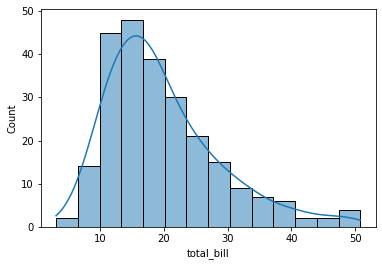

In [50]:
sns.histplot(df['total_bill'], kde=True)

In [51]:
### Outliers

In [52]:
# define our dataset
import random
dataset = [random.randint(0,100) for i in range(50)]

In [53]:
print(dataset)

[49, 50, 27, 97, 66, 53, 68, 25, 74, 38, 89, 95, 87, 92, 93, 81, 36, 49, 0, 14, 54, 55, 68, 42, 38, 95, 95, 74, 51, 28, 25, 14, 51, 52, 10, 11, 47, 25, 9, 58, 45, 80, 42, 42, 60, 51, 58, 44, 83, 17]


In [54]:
# list of outliers
out = [400, 450, 570, 700]
dataset+=out
print(dataset)

[49, 50, 27, 97, 66, 53, 68, 25, 74, 38, 89, 95, 87, 92, 93, 81, 36, 49, 0, 14, 54, 55, 68, 42, 38, 95, 95, 74, 51, 28, 25, 14, 51, 52, 10, 11, 47, 25, 9, 58, 45, 80, 42, 42, 60, 51, 58, 44, 83, 17, 400, 450, 570, 700]


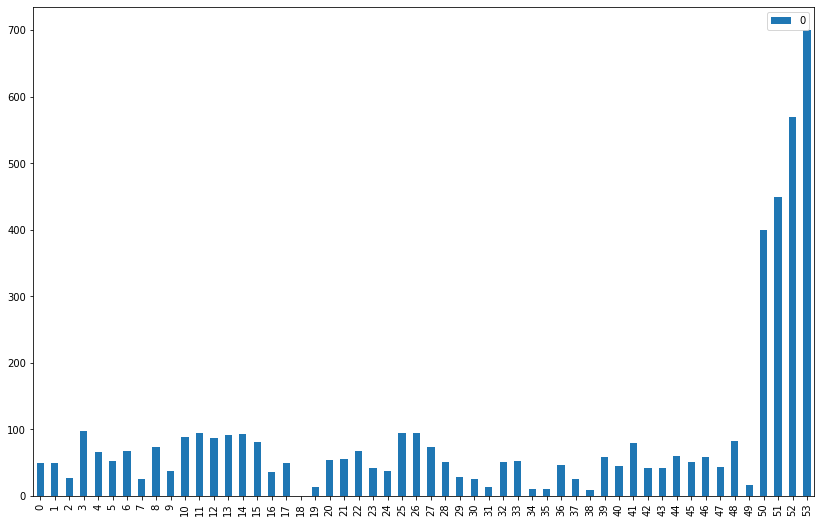

In [55]:
pd.DataFrame(dataset).plot(kind='bar', figsize=(14, 9))

In [56]:
## z score

outliers = []

def detect_outliers(data):
  threshold = 3 #everythigs fall above 3 std is an outlier
  mean = np.mean(data)
  std = np.std(data)
  for i in  data:
    z_score = (i-mean) / std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [57]:
print(
    detect_outliers(dataset)
)

# no outlieres in my data

[570, 700]


In [58]:
## IQR : FIND OUT the lower and the higher fence
    # 1. sort data
    # 2. calculate q1 and q3
    # 3. find out IQR
    # 4. find the lower fence (q1 - 1.5(IQR))
    # 5. find the upper fence (q3 + 1.5(IQR))

In [59]:
# 1. sort data
dataset = sorted(dataset)
print(dataset)

[0, 9, 10, 11, 14, 14, 17, 25, 25, 25, 27, 28, 36, 38, 38, 42, 42, 42, 44, 45, 47, 49, 49, 50, 51, 51, 51, 52, 53, 54, 55, 58, 58, 60, 66, 68, 68, 74, 74, 80, 81, 83, 87, 89, 92, 93, 95, 95, 95, 97, 400, 450, 570, 700]


In [60]:
# 2. calculate q1 and q3
q1, q3 = np.percentile(dataset, [25, 75])
print(
    q1,'\n',
    q3
)

38.0 
 80.75


In [61]:
# 3. find out IQR
iqr = q3-q1
print(
    iqr
)

42.75


In [62]:
# 4. find the lower fence (q1 - 1.5(IQR))
lower_fence =q1-(1.5*iqr)
higher_fence =q3+(1.5*iqr)
print(
    lower_fence,'\n',
    higher_fence
)

-26.125 
 144.875


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


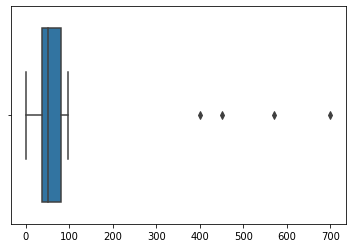

In [63]:
sns.boxplot(dataset)